In [25]:
pip install -Uqq timm

Note: you may need to restart the kernel to use updated packages.


In [26]:
from fastai.vision.all import *

In [27]:
path = Path('/kaggle/input/color-classification/ColorClassification')
def get_images(path):
    out = get_image_files(path)
    out = [o for o in out if not o.parent.name.startswith('mask')]
    out = [o for o in out if not o.parent.name.startswith('testimg')]
    return out

files = get_images(path)            

In [28]:
import pandas as pd
df = pd.DataFrame(files,columns=['file'])
df['target'] = [o.parent.name for o in df['file']]

df

,file,target
0,/kaggle/input/color-classification/ColorClassification/orange/6.jpg,orange
1,/kaggle/input/color-classification/ColorClassification/orange/5.jpg,orange
2,/kaggle/input/color-classification/ColorClassification/orange/8.jpg,orange
3,/kaggle/input/color-classification/ColorClassification/orange/10.jpg,orange
4,/kaggle/input/color-classification/ColorClassification/orange/9.jpg,orange
...,...,...
160,/kaggle/input/color-classification/ColorClassification/Brown/3.jpg,Brown
161,/kaggle/input/color-classification/ColorClassification/Brown/19.jpg,Brown
162,/kaggle/input/color-classification/ColorClassification/Brown/14.jpg,Brown
163,/kaggle/input/color-classification/ColorClassification/Brown/18.jpg,Brown


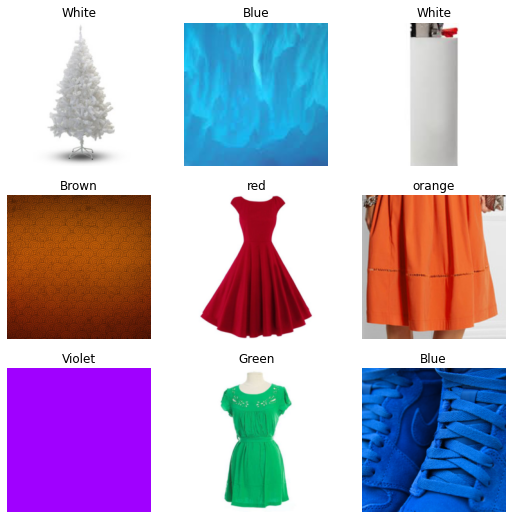

In [29]:
dls = ImageDataLoaders.from_df(df,path='/', item_tfms=Resize(224))
dls.show_batch()

In [30]:
learn = vision_learner(dls,'resnet34',metrics=error_rate)
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,time
0,3.684374,4.597885,0.878788,00:04


epoch,train_loss,valid_loss,error_rate,time
0,2.962537,3.256581,0.878788,00:03
1,2.835159,2.366880,0.787879,00:04
2,2.674897,1.815013,0.666667,00:04
3,2.442651,1.365282,0.515152,00:04
4,2.188132,1.001195,0.363636,00:03
5,1.936874,0.775206,0.303030,00:04
6,1.727672,0.625018,0.181818,00:04
7,1.537582,0.526077,0.181818,00:04
8,1.371909,0.475442,0.181818,00:04
9,1.226924,0.424865,0.151515,00:04
